**SIMULATED ANNEALING ALGORITHM**

**kroa150 Dataset (Optimal Solution - 26524)**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import time

**Define Coordinate Class**

In [2]:
class Coordinate:
    def __init__(self, x, y):
        self.x = x
        self.y = y
    
    #Calculate Euclidean distance between two coordinates
    @staticmethod
    def get_distance(a, b):
        return math.sqrt((a.x - b.x) ** 2 + (a.y - b.y) ** 2)
    
    #Compute total distance for a given route
    @staticmethod
    def get_total_distance(coords):
        dist = sum(Coordinate.get_distance(a, b) for a, b in zip(coords[:-1], coords[1:]))
        dist += Coordinate.get_distance(coords[0], coords[-1])
        return dist

**Load Dataset**

In [3]:
coordinates = [
    (1380, 939), (2848, 96), (3510, 1671), (457, 334), (3888, 666),
    (984, 965), (2721, 1482), (1286, 525), (2716, 1432), (738, 1325),
    (1251, 1832), (2728, 1698), (3815, 169), (3683, 1533), (1247, 1945),
    (123, 862), (1234, 1946), (252, 1240), (611, 673), (2576, 1676),
    (928, 1700), (53, 857), (1807, 1711), (274, 1420), (2574, 946),
    (178, 24), (2678, 1825), (1795, 962), (3384, 1498), (3520, 1079),
    (1256, 61), (1424, 1728), (3913, 192), (3085, 1528), (2573, 1969),
    (463, 1670), (3875, 598), (298, 1513), (3479, 821), (2542, 236),
    (3955, 1743), (1323, 280), (3447, 1830), (2936, 337), (1621, 1830),
    (3373, 1646), (1393, 1368), (3874, 1318), (938, 955), (3022, 474),
    (2482, 1183), (3854, 923), (376, 825), (2519, 135), (2945, 1622),
    (953, 268), (2628, 1479), (2097, 981), (890, 1846), (2139, 1806),
    (2421, 1007), (2290, 1810), (1115, 1052), (2588, 302), (327, 265),
    (241, 341), (1917, 687), (2991, 792), (2573, 599), (19, 674),
    (3911, 1673), (872, 1559), (2863, 558), (929, 1766), (839, 620),
    (3893, 102), (2178, 1619), (3822, 899), (378, 1048), (1178, 100),
    (2599, 901), (3416, 143), (2961, 1605), (611, 1384), (3113, 885),
    (2597, 1830), (2586, 1286), (161, 906), (1429, 134), (742, 1025),
    (1625, 1651), (1187, 706), (1787, 1009), (22, 987), (3640, 43),
    (3756, 882), (776, 392), (1724, 1642), (198, 1810), (3950, 1558),
    (3477, 949), (91, 1732), (3972, 329), (198, 1632), (1806, 733),
    (538, 1023), (3430, 1088), (2186, 766), (1513, 1646), (2143, 1611),
    (53, 1657), (3404, 1307), (1034, 1344), (2823, 376), (3104, 1931),
    (3232, 324), (2790, 1457), (374, 9), (741, 146), (3083, 1938),
    (3502, 1067), (1280, 237), (3326, 1846), (217, 38), (2503, 1172),
    (3527, 41), (739, 1850), (3548, 1999), (48, 154), (1419, 872),
    (1689, 1223), (3468, 1404), (1628, 253), (382, 872), (3029, 1242),
    (3646, 1758), (285, 1029), (1782, 93), (1067, 371), (2849, 1214),
    (920, 1835), (1741, 712), (876, 220), (2753, 283), (2609, 1286),
    (3941, 258), (3613, 523), (1754, 559), (2916, 1724), (2445, 1820)
]


**Simulated Annealing Algorithm**

In [4]:
#SA params: 
# T0 = initial temperature
# r = cooling rate 
# max_iterations = max number of iterations

def Simulated(T0=40000, r=0.80, max_iterations=1000):

    #Turns dataset into Coordinate objects
    coords = [Coordinate(x, y) for x, y in coordinates]

    best_route = coords[:]
    best_distance = Coordinate.get_total_distance(coords)

    start_time = time.time()
    T = T0

    for _ in range(max_iterations):
        L = np.random.randint(10, 31)
        for _ in range(L):
            r1, r2 = np.random.randint(0, len(coords), size=2) 
            coords[r1], coords[r2] = coords[r2], coords[r1]

            current_distance = Coordinate.get_total_distance(coords) #swap cities

            #Acceptance probability
            if current_distance < best_distance or np.random.uniform() < np.exp((best_distance - current_distance) / T):
                best_distance = current_distance
                best_route = coords[:]
            else:
                coords[r1], coords[r2] = coords[r2], coords[r1] #revert swap

        T *= r
    
    best_route.append(best_route[0])

    end_time = time.time()
    cpu_time = end_time - start_time

    best_tour_indices = [coordinates.index((c.x, c.y)) for c in best_route]

    print(f"Best Tour: {best_tour_indices}")
    print(f"Best Length: {best_distance:.2f}")
    print(f"CPU Time: {cpu_time:.4f} seconds")

    fig, ax = plt.subplots(figsize=(10, 6))

    for first, second in zip(best_route[:-1], best_route[1:]):
        ax.plot([first.x, second.x], [first.y, second.y], 'b')
    ax.plot([best_route[0].x, best_route[-1].x], [best_route[0].y, best_route[-1].y], 'b')

    for i, c in enumerate(best_route):
        ax.plot(c.x, c.y, 'ro')
        ax.text(c.x + 1, c.y + 1, f'{i}', color='black', fontsize=8)

    ax.set_title('Simulated Annealing for Symmetric TSP')
    ax.set_xlabel('X Coordinate')
    ax.set_ylabel('Y Coordinate')
    plt.show()


Implementations

1st

Best Tour: [120, 29, 145, 32, 75, 102, 4, 95, 146, 43, 143, 72, 67, 24, 97, 90, 108, 31, 73, 133, 52, 64, 3, 74, 91, 141, 1, 81, 115, 113, 48, 105, 37, 35, 101, 98, 126, 140, 34, 85, 26, 19, 5, 78, 136, 17, 23, 83, 9, 27, 60, 68, 39, 63, 53, 137, 117, 123, 25, 128, 69, 110, 103, 71, 124, 144, 6, 116, 8, 50, 18, 87, 15, 93, 21, 65, 118, 0, 92, 130, 14, 16, 58, 89, 55, 79, 30, 88, 7, 46, 22, 76, 59, 129, 138, 142, 96, 104, 66, 57, 61, 149, 11, 54, 148, 82, 33, 84, 125, 94, 12, 36, 77, 45, 119, 114, 127, 42, 122, 56, 132, 121, 41, 147, 107, 80, 134, 106, 111, 131, 28, 2, 135, 13, 70, 40, 99, 47, 51, 49, 62, 112, 20, 10, 44, 109, 86, 139, 100, 38, 120]
Best Length: 67819.37
CPU Time: 4.4849 seconds


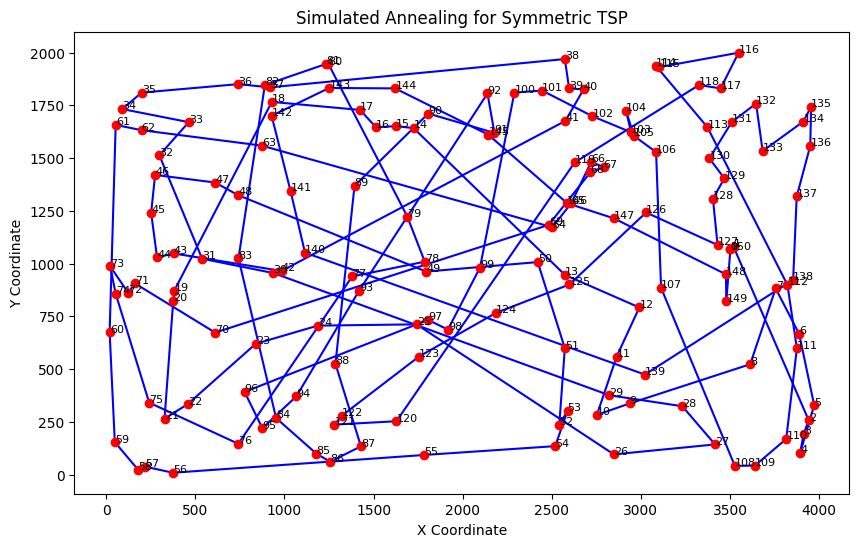

In [5]:
Simulated()

2nd

Best Tour: [11, 26, 90, 71, 98, 103, 17, 136, 78, 133, 91, 88, 137, 132, 141, 46, 31, 97, 61, 149, 34, 59, 22, 140, 58, 73, 38, 102, 145, 32, 12, 75, 36, 77, 146, 115, 81, 125, 94, 4, 51, 95, 24, 27, 41, 121, 30, 147, 57, 107, 66, 104, 129, 0, 48, 9, 23, 101, 110, 18, 118, 55, 79, 142, 96, 3, 64, 52, 87, 93, 37, 126, 20, 28, 111, 134, 112, 35, 83, 92, 86, 144, 67, 84, 106, 100, 29, 47, 13, 131, 80, 7, 138, 74, 105, 89, 62, 130, 119, 114, 45, 120, 49, 43, 1, 39, 53, 63, 68, 60, 8, 116, 54, 82, 33, 122, 2, 40, 70, 99, 135, 42, 127, 148, 5, 15, 21, 69, 65, 123, 25, 128, 117, 143, 113, 72, 139, 6, 19, 76, 109, 56, 124, 50, 108, 10, 14, 16, 44, 85, 11]
Best Length: 66932.31
CPU Time: 4.5508 seconds


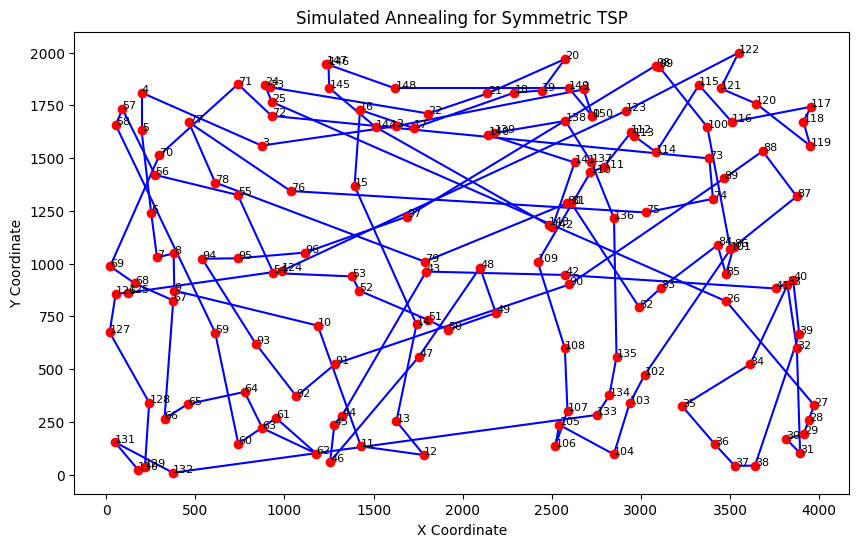

In [6]:
Simulated()

3rd

Best Tour: [117, 25, 123, 142, 55, 138, 96, 3, 128, 64, 107, 60, 24, 50, 124, 120, 47, 51, 32, 145, 102, 95, 77, 106, 29, 49, 39, 53, 74, 133, 136, 87, 93, 52, 91, 141, 104, 66, 147, 88, 30, 79, 121, 48, 9, 83, 71, 16, 14, 10, 46, 0, 129, 5, 62, 92, 27, 144, 8, 116, 54, 114, 119, 148, 26, 11, 6, 137, 132, 41, 7, 59, 61, 56, 86, 68, 63, 143, 115, 81, 125, 43, 113, 72, 84, 99, 70, 40, 127, 34, 149, 44, 103, 110, 101, 98, 146, 36, 4, 38, 100, 134, 82, 33, 45, 2, 28, 131, 105, 17, 23, 37, 35, 126, 140, 58, 22, 97, 109, 76, 90, 108, 31, 73, 20, 112, 57, 80, 139, 111, 13, 135, 42, 122, 89, 78, 15, 21, 69, 65, 18, 130, 85, 19, 67, 12, 75, 94, 1, 118, 117]
Best Length: 67703.58
CPU Time: 3.8616 seconds


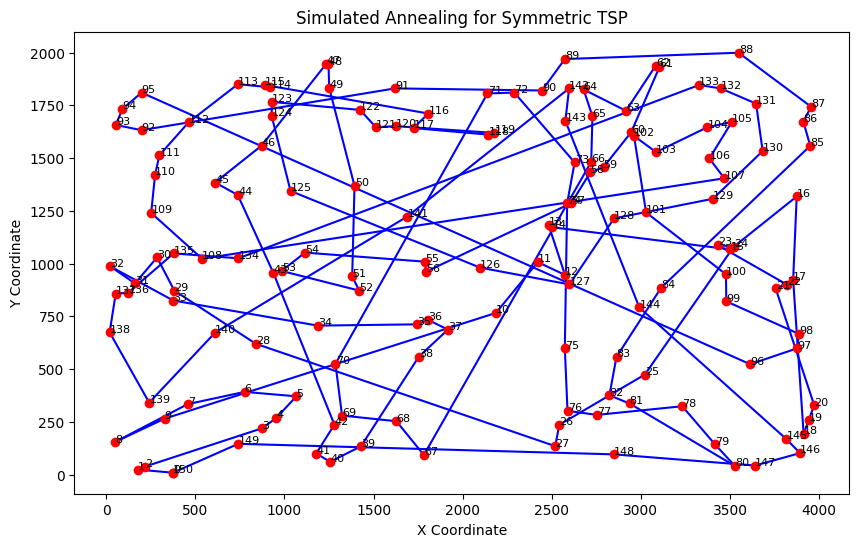

In [7]:
Simulated()

4th

Best Tour: [132, 41, 79, 30, 137, 72, 99, 70, 40, 13, 139, 124, 50, 20, 73, 140, 58, 71, 112, 62, 141, 53, 1, 115, 81, 125, 94, 145, 102, 146, 100, 11, 149, 61, 59, 109, 19, 134, 67, 84, 29, 95, 77, 51, 4, 36, 38, 49, 24, 80, 86, 144, 6, 116, 33, 28, 135, 2, 45, 54, 148, 122, 127, 42, 82, 57, 92, 129, 3, 117, 128, 123, 25, 64, 18, 74, 91, 130, 76, 56, 8, 27, 0, 89, 105, 78, 136, 17, 9, 34, 114, 119, 26, 85, 22, 90, 108, 14, 16, 10, 133, 87, 15, 21, 93, 69, 65, 118, 142, 55, 138, 96, 52, 23, 103, 101, 110, 37, 83, 121, 88, 7, 48, 5, 46, 44, 31, 35, 98, 126, 97, 106, 120, 60, 107, 68, 63, 39, 143, 113, 43, 12, 75, 32, 47, 131, 111, 66, 104, 147, 132]
Best Length: 60145.96
CPU Time: 3.9415 seconds


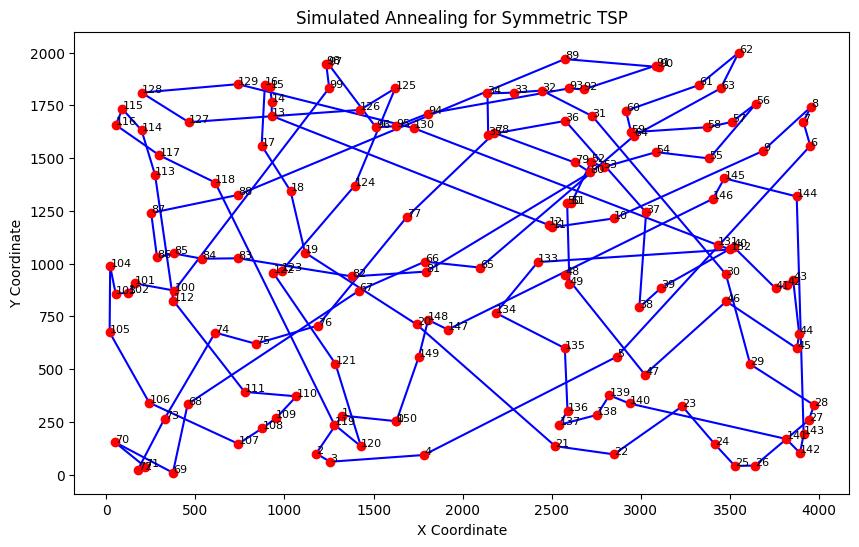

In [8]:
Simulated()

5th

Best Tour: [15, 96, 79, 30, 7, 60, 45, 2, 28, 134, 80, 137, 88, 121, 41, 132, 53, 1, 72, 67, 13, 42, 122, 56, 104, 147, 66, 81, 125, 94, 75, 102, 146, 115, 49, 116, 6, 8, 86, 68, 63, 39, 143, 113, 43, 38, 100, 106, 139, 144, 124, 130, 46, 3, 64, 128, 65, 25, 123, 117, 118, 142, 55, 138, 27, 92, 57, 50, 82, 54, 19, 26, 85, 148, 33, 95, 4, 36, 145, 32, 12, 74, 18, 133, 52, 17, 83, 62, 0, 107, 111, 131, 119, 114, 34, 149, 14, 16, 98, 101, 110, 103, 97, 109, 76, 59, 90, 44, 31, 140, 58, 126, 35, 93, 21, 69, 105, 89, 61, 11, 29, 77, 51, 84, 24, 108, 10, 9, 48, 5, 91, 129, 141, 120, 47, 99, 40, 70, 135, 127, 22, 112, 78, 136, 23, 37, 73, 71, 20, 87, 15]
Best Length: 67430.40
CPU Time: 3.4591 seconds


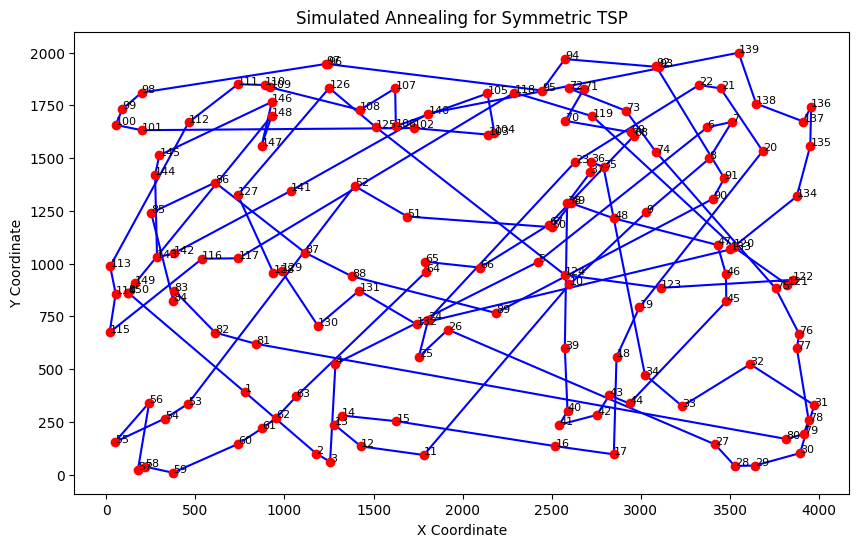

In [9]:
Simulated()

6th

Best Tour: [128, 55, 121, 137, 39, 3, 64, 118, 142, 96, 133, 136, 78, 71, 20, 73, 126, 35, 103, 93, 87, 17, 58, 140, 16, 14, 31, 80, 146, 102, 145, 81, 1, 43, 72, 49, 67, 139, 82, 114, 119, 122, 29, 120, 106, 134, 8, 10, 98, 101, 110, 23, 105, 89, 0, 38, 95, 4, 36, 32, 75, 115, 84, 33, 148, 26, 54, 6, 56, 109, 97, 90, 22, 59, 11, 144, 24, 7, 123, 25, 117, 30, 88, 132, 147, 57, 107, 66, 104, 141, 27, 116, 45, 111, 100, 12, 94, 125, 143, 63, 41, 138, 74, 52, 15, 69, 21, 79, 53, 113, 68, 129, 112, 46, 108, 44, 42, 135, 70, 13, 131, 28, 2, 127, 40, 99, 47, 51, 77, 124, 86, 50, 130, 83, 37, 9, 48, 91, 92, 60, 76, 61, 149, 34, 85, 19, 62, 5, 18, 65, 128]
Best Length: 68277.07
CPU Time: 5.7868 seconds


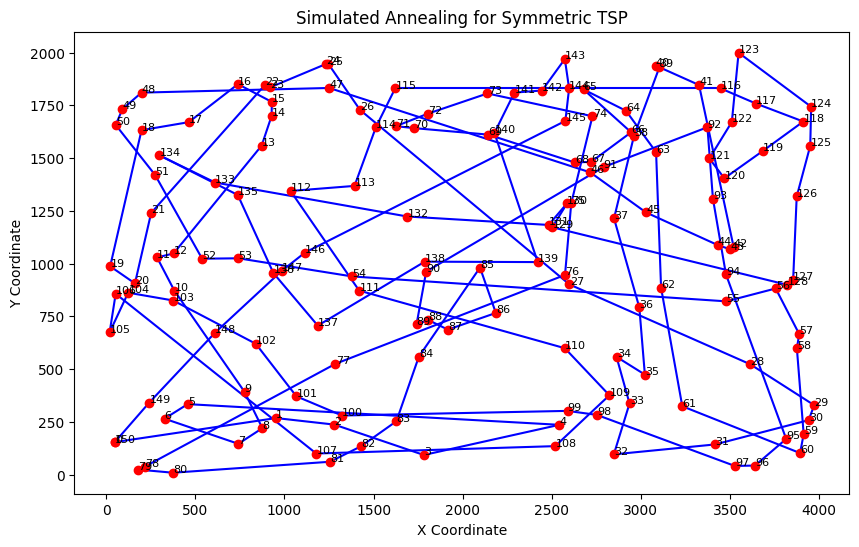

In [10]:
Simulated()

7th

Best Tour: [94, 12, 36, 4, 134, 139, 56, 148, 33, 42, 135, 40, 99, 51, 95, 38, 100, 106, 29, 120, 124, 57, 112, 71, 83, 62, 63, 53, 137, 132, 88, 48, 5, 91, 7, 138, 55, 96, 78, 136, 93, 21, 15, 89, 92, 50, 109, 22, 44, 90, 0, 121, 118, 117, 123, 25, 65, 110, 101, 35, 86, 144, 24, 60, 107, 66, 27, 130, 85, 119, 114, 34, 61, 59, 14, 16, 73, 98, 103, 37, 9, 20, 10, 140, 58, 126, 23, 17, 128, 64, 3, 142, 41, 67, 13, 2, 45, 82, 54, 6, 116, 84, 102, 145, 32, 75, 108, 31, 97, 149, 28, 111, 131, 127, 122, 70, 47, 77, 146, 1, 39, 143, 113, 49, 72, 68, 80, 8, 11, 26, 19, 76, 46, 105, 18, 74, 147, 104, 141, 129, 52, 133, 87, 69, 79, 30, 43, 115, 81, 125, 94]
Best Length: 65324.03
CPU Time: 6.7129 seconds


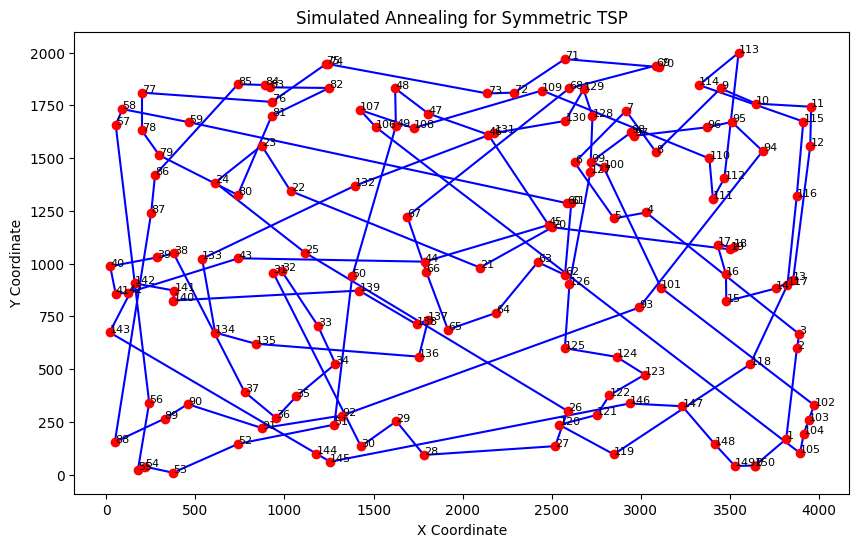

In [11]:
Simulated()

8th

Best Tour: [117, 123, 128, 69, 87, 17, 129, 147, 104, 27, 92, 41, 138, 132, 125, 12, 145, 102, 72, 113, 63, 107, 10, 73, 20, 71, 126, 35, 83, 112, 130, 100, 95, 77, 51, 13, 135, 45, 33, 82, 54, 148, 85, 114, 119, 11, 19, 149, 34, 26, 29, 120, 36, 32, 75, 146, 38, 84, 67, 68, 80, 6, 116, 28, 42, 2, 131, 111, 106, 134, 139, 144, 22, 31, 58, 140, 16, 14, 61, 59, 44, 136, 93, 21, 15, 141, 66, 60, 50, 86, 124, 24, 49, 115, 81, 94, 4, 47, 99, 70, 40, 127, 122, 56, 8, 57, 30, 79, 88, 137, 39, 143, 1, 43, 53, 78, 110, 101, 98, 103, 37, 23, 9, 97, 76, 109, 91, 96, 52, 133, 105, 89, 74, 55, 121, 7, 0, 46, 90, 108, 62, 5, 48, 18, 118, 142, 3, 65, 64, 25, 117]
Best Length: 60713.44
CPU Time: 4.8123 seconds


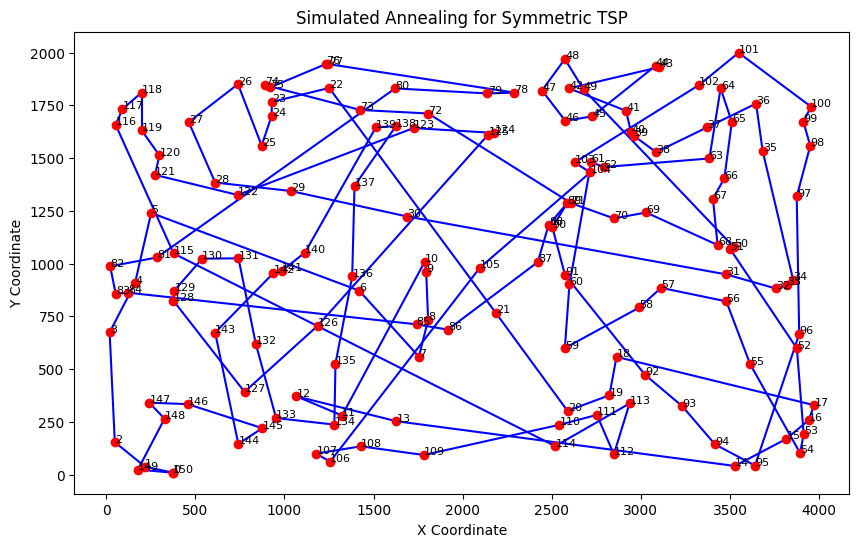

In [12]:
Simulated()

9th

Best Tour: [97, 31, 44, 139, 106, 4, 36, 77, 51, 47, 42, 122, 82, 54, 144, 60, 66, 104, 27, 149, 85, 33, 100, 146, 125, 81, 72, 124, 50, 57, 147, 141, 107, 80, 24, 86, 130, 92, 129, 138, 55, 96, 123, 117, 118, 142, 79, 30, 7, 91, 112, 9, 5, 39, 53, 12, 38, 115, 140, 58, 126, 93, 21, 15, 136, 23, 37, 103, 22, 116, 131, 111, 68, 132, 41, 121, 88, 137, 1, 94, 75, 32, 102, 145, 95, 29, 120, 49, 43, 63, 143, 113, 67, 84, 134, 11, 26, 148, 45, 8, 74, 18, 3, 64, 52, 133, 87, 17, 83, 14, 108, 109, 76, 56, 6, 127, 135, 70, 99, 40, 13, 2, 28, 0, 62, 48, 89, 105, 78, 20, 73, 16, 10, 46, 71, 35, 98, 101, 110, 69, 128, 25, 65, 19, 114, 119, 34, 61, 59, 90, 97]
Best Length: 67622.09
CPU Time: 5.2423 seconds


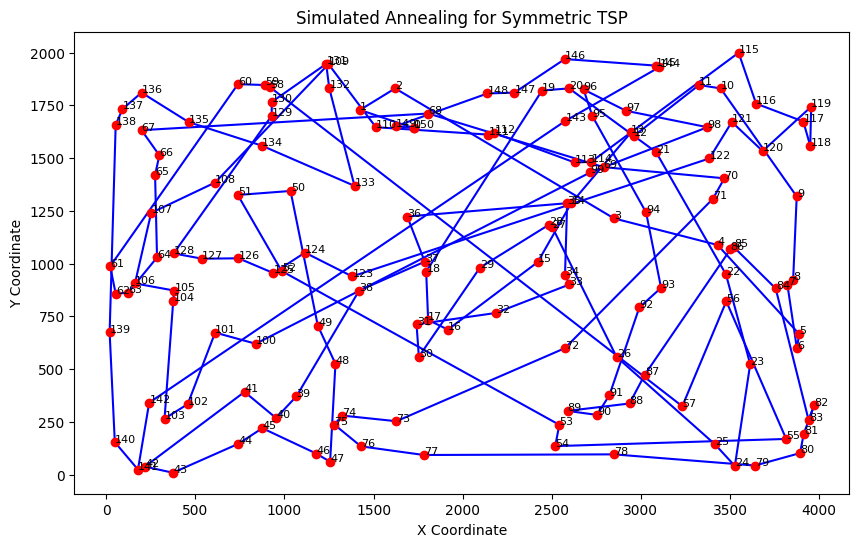

In [13]:
Simulated()

10th

Best Tour: [141, 107, 113, 75, 12, 39, 132, 137, 53, 125, 94, 81, 43, 1, 143, 63, 41, 96, 118, 55, 79, 88, 30, 121, 13, 70, 40, 99, 4, 102, 36, 120, 111, 33, 19, 59, 97, 90, 92, 104, 66, 124, 80, 24, 134, 131, 28, 45, 42, 122, 114, 20, 83, 15, 87, 46, 108, 8, 116, 82, 54, 148, 11, 6, 86, 144, 145, 32, 115, 49, 147, 89, 52, 69, 3, 91, 50, 56, 109, 31, 16, 14, 61, 34, 47, 51, 77, 95, 146, 38, 29, 2, 135, 127, 119, 26, 85, 149, 27, 7, 74, 18, 133, 126, 140, 10, 44, 22, 76, 130, 129, 138, 142, 64, 65, 128, 25, 123, 117, 98, 101, 35, 58, 73, 57, 68, 72, 67, 84, 100, 106, 139, 60, 0, 62, 5, 48, 112, 71, 78, 136, 93, 21, 110, 103, 37, 23, 17, 105, 9, 141]
Best Length: 69560.22
CPU Time: 3.6336 seconds


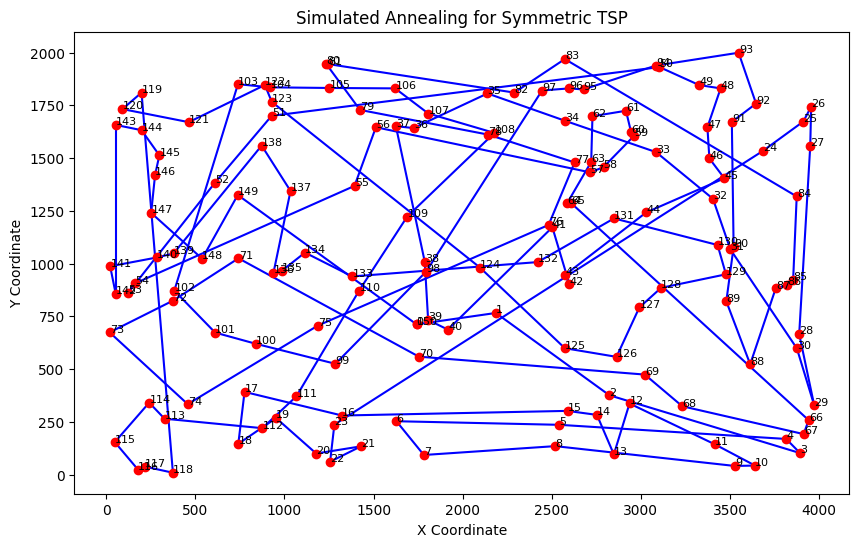

In [14]:
Simulated()